In [1]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

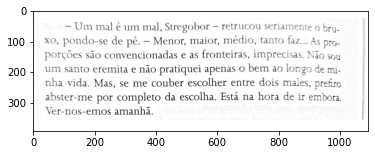

In [3]:
imagem = cv2.imread('imagens/trecho_livro.png')
plt.imshow(imagem)

In [4]:
texto = pytesseract.image_to_string(imagem, lang='por')
print(texto)

— Um mal é um mal, Stregobor — retrucou seriamente o bru.
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... A
porções são convencionadas e as fronteiras, imprecisas. »
um santo eremita e não pratiquei apenas o bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro

abster-me por completo da escolha. Está na hora de ir embora.
Ver-nos-emos amanhã.

 

S pro-

ão Sou

 

 



In [15]:
config_tesseract = '/usr/share/tesseract-ocr/4.00/tessdata --psm 6'

In [16]:
texto = pytesseract.image_to_string(imagem, lang='por', config=config_tesseract)
print(texto)

— Um mal é um mal, Stregobor — retrucou seriamente o bru.
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... A
porções são convencionadas e as fronteiras, imprecisas. »
um santo eremita e não pratiquei apenas o bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro

abster-me por completo da escolha. Está na hora de ir embora.
Ver-nos-emos amanhã.

 

S pro-

ão Sou

 

 



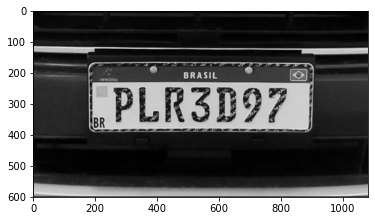

In [22]:
imagem = cv2.imread('imagens/placa_carro1.png')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
plt.imshow(imagem, cmap='gray')

In [24]:
config_tesseract = '/usr/share/tesseract-ocr/4.00/tessdata'
texto = pytesseract.image_to_string(imagem, lang='por', config=config_tesseract)
print(texto)

## Aplicando limiar na imagem

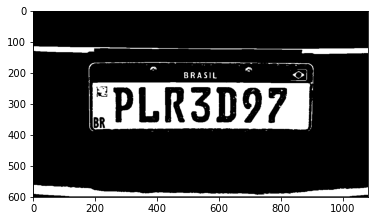

In [47]:
limiar = 160
valor, lim_simples = cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY)
plt.imshow(lim_simples, cmap='gray');

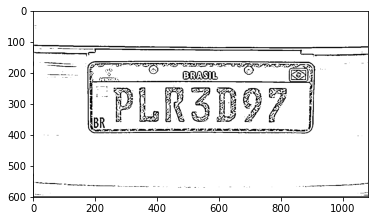

In [52]:
lim_adapt = cv2.adaptiveThreshold(imagem, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
plt.imshow(lim_adapt, cmap='gray');